# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Komang Ayu Agung Arya Aprilia
- **Email:** ayuagungaprilia@gmail.com
- **ID Dicoding:** ayuaprliia

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah penyewaan sepeda berdasarkan hari kerja (working day),  akhir pekan (weekend), dan holiday?
- Bagaimana jumlah penyewaan sepeda sepanjang hari berdasarkan jam-jam tertentu?
- Bagaimana perbandingan penyewaan sepeda antara registered dan casual users?
- Kondisi cuaca apa yang memiliki jumlah penyewaan sepeda paling sedikit?


## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahapan di atas, dilakukan kegiatan gathering data yang bertujuan untuk mengumpulkan data yang dibutuhkan dalam proses analisis.
- Dengan menggunakan library Pandas, proses gathering data dapat dilakukan dengan memanfaatkan function `read_csv()` yang berfungsi untuk membaca berkas day.csv dan hour.csv yang merupakan berkas Comma-Separated Values, dan menyimpannya ke dalam variabel `day_df` serta `hour_df` sebagai DataFrame. Kemudian menggunakan method `head()` untuk memuat dan menampilkan 5 baris pertama dari masing-masing Dataframe.

### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tahapan ini, dilakukan proses assessing data yang bertujuan untuk menilai kualitas data guna mengidentifikasi masalah yang terdapat di dalam data. Tahapan ini sangatlah berguna untuk mengidentifikasi masalah seperti *missing value*, *invalid value*, *duplicate data*, dll.
- Setelah melakukan *assessing data*, pada tabel `day_df` dan `hour_df` tidak ditemukan adanya *missing value* maupun duplikasi data. Akan tetapi, pada kolom **dteday** pada masing-masing tabel memiliki tipe data yang salah. Kolom tersebut memiliki tipe data **object** (string), dimana seharusnya direpresentasikan dengan tipe data **datetime**.

### Cleaning Data

#### Membersihkan tabel `day_df` dan `hour_df`

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada tahapan ini, dilakukan proses *cleaning data* yang bertujuan untuk membersihkan serta mengoreksi masalah yang sudah diidentifikasi pada tahap *assessing data*.
- Permasalahan yang kini perlu diatasi adalah mengubah tipe data pada kolom **dteday** yang awalnya berupa **object** menjadi **datetime**. Proses ini dapat dilakukan dengan menggunakan *function* **to.datetime()** yang telah disediakan oleh *library* Pandas.
- Untuk melihat dan memeriksa bahwa hasil sesuai dengan ekspektasi, jalankan *method* **info()**.

## Exploratory Data Analysis (EDA)

### Explore tabel `day_df`

In [39]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [95]:
#Jumlah sewa berdasarkan hari kerja (working day), akhir pekan (weekend), dan holiday

day_df['day_category'] = day_df.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Weekend' if row['workingday'] == 0 else 'Working Day'), axis=1)

rental_counts = day_df.groupby('day_category')['cnt'].sum().reset_index()

working_day_rents = day_df[day_df['workingday'] == 1].groupby('weekday')['cnt'].sum().reset_index()
working_day_rents['day_category'] = 'Working Day'

print("Total Rents Based on Day Category:")
print(rental_counts)
print("\nTotal Rents Based on Working Day Only :")
print(working_day_rents)

Total Rents Based on Day Category:
  day_category      cnt
0      Holiday    78435
1      Weekend   921834
2  Working Day  2292410

Total Rents Based on Working Day Only :
   weekday     cnt day_category
0        1  395898  Working Day
1        2  468096  Working Day
2        3  465645  Working Day
3        4  481475  Working Day
4        5  481296  Working Day


### Explore tabel `hour_df`

In [45]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_category
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Working Day
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [28]:
# jumlah penyewaan sepeda berdasarkan jam-jam tertentu?
hourly_rental = hour_df.groupby('hr')['cnt'].sum().reset_index()

print("Total Rents Based on Hour of the Day:")
print(hourly_rental)

Total Rents Based on Hour of the Day:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [50]:
# Perbandingan Penyewaan Sepeda antara registered dan casual users

# Total rentals by registered and casual users
total_rentals = hour_df[['registered', 'casual']].sum().reset_index()
total_rentals.columns = ['User Type', 'Total Rentals']

# Average daily rentals by registered and casual users
avg_daily_rentals = hour_df.groupby('dteday')[['registered', 'casual']].mean().mean().reset_index()
avg_daily_rentals.columns = ['User Type', 'Average Daily Rentals']
avg_daily_rentals['Average Daily Rentals'] = avg_daily_rentals['Average Daily Rentals'].round(0)

# Rental trends by hour for both registered and casual users
hourly_rentals = hour_df.groupby('hr')[['registered', 'casual']].sum().reset_index()

# Comparison of registered and casual rentals by working day and weekend
hour_df['day_category'] = hour_df.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Weekend' if row['workingday'] == 0 else 'Working Day'), axis=1)
user_type_day_category = hour_df.groupby(['day_category'])[['registered', 'casual']].sum().reset_index()


print("Total Rentals Between Registered and Casual Users:")
print(total_rentals)

print("\nAverage Daily Rentals by Registered and Casual Users:")
print(avg_daily_rentals)

print("\nRental Trends by Hour (Registered and Casual Users):")
print(hourly_rentals)

print("\nComparison of Rentals by Day Category (Working Day, Weekend, Holiday):")
print(user_type_day_category)


Total Rentals Between Registered and Casual Users:
    User Type  Total Rentals
0  registered        2672662
1      casual         620017

Average Daily Rentals by Registered and Casual Users:
    User Type  Average Daily Rentals
0  registered                  153.0
1      casual                   35.0

Rental Trends by Hour (Registered and Casual Users):
    hr  registered  casual
0    0       31755    7375
1    1       19455    4709
2    2       12940    3412
3    3        6281    1893
4    4        3554     874
5    5       13249    1012
6    6       52115    3017
7    7      146134    8037
8    8      245240   15761
9    9      136980   22458
10  10       92468   33789
11  11      108034   43286
12  12      134696   49718
13  13      132206   52713
14  14      120563   55089
15  15      128543   54606
16  16      173914   53834
17  17      282640   54220
18  18      265276   44496
19  19      191284   35505
20  20      138172   26378
21  21      104875   20570
22  22       79412   

In [158]:
# pengaruh cuaca terhadap jumlah penyewaan sepeda

weathersit_rentals = hour_df.groupby('weathersit')['cnt'].agg('sum').reset_index()

weathersit_rentals['weathersit'] = weathersit_rentals['weathersit'].replace({
    1: 'Clear, Few clouds',
    2: 'Mist+cloudy',
    3: 'Light Snow, light rain',
    4: 'Heavy Rain'
})

weathersit_rentals.columns = ['Weather Condition', 'Total Rentals']

print("Pengaruh Weathersit terhadap Penyewaan Sepeda:")
print(weathersit_rentals)


Pengaruh Weathersit terhadap Penyewaan Sepeda:
        Weather Condition  Total Rentals
0       Clear, Few clouds        2338173
1             Mist+cloudy         795952
2  Light Snow, light rain         158331
3              Heavy Rain            223


**Insight:**
- Proses di atas merupakan tahap *Exploratory Data Analysis* yang bertujuan untuk melakukan eksplorasi terhadap data guna mengenalnya lebih jauh.
- Berdasarkan eksplorasi pada tabel `day_df`, ditemukan bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja atau *working day* dibandingkan dengan *weekend* dan *holiday*, serta mencapai jumlah sewa tertinggi pada hari Kamis.
- Jumlah penyewaan sepeda berdasarkan jam-jam tertentu mulai mengalami peningaktan secara signifikan dimulai dari pukul 07.00 hingga pukul 08.00, dan mencapai puncaknya pada pukul 17.00 hingga 18.00. Jumlah penyewaan kemudian menurun pada malam hari.
- Berdasarkan hasil esksplorasi pada tabel `hour_df`, ditemukan bahwa *registered users* memiliki tingkat penyewaan yang lebih tinggi dibandingkan dengan *casual users*, baik secara harian, berdasarkan jam, serta berdasarkan kategori hari.
- Jumlah penyewaan sepeda meningkat saat cuaca cerah dan cenderung berawan dibandingkan dengan cuaca lainnya. Pada saat hujan lebat, jumlah penyewaan berada pada jumlah terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

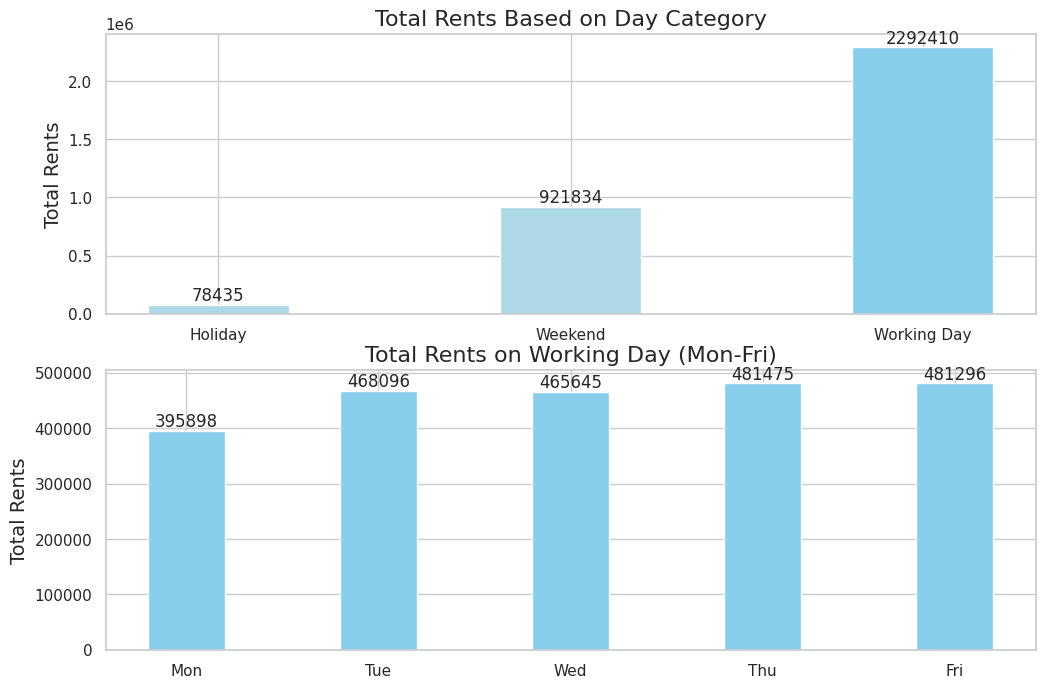

In [114]:
weekday_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri'}
working_day_rents = day_df[day_df['workingday'] == 1].groupby('weekday')['cnt'].sum().reset_index()
working_day_rents['weekday'] = working_day_rents['weekday'].replace(weekday_mapping)

plt.figure(figsize=(12, 8))

# Total Rents Based on Day Category bar chart
plt.subplot(2, 1, 1)
plt.bar(rental_counts['day_category'], rental_counts['cnt'], color=['lightblue', 'lightblue', 'skyblue'], width=0.4)
plt.title('Total Rents Based on Day Category', fontsize=16)
plt.ylabel('Total Rents', fontsize=14)
plt.xticks(rotation=0)

for index, value in enumerate(rental_counts['cnt']):
    plt.text(index, value, f"{value}", ha='center', va='bottom')

# Total Rents on Working Dau (Mon-Fri)
plt.subplot(2, 1, 2)
plt.bar(working_day_rents['weekday'], working_day_rents['cnt'], color='skyblue', width=0.4)
plt.title('Total Rents on Working Day (Mon-Fri)', fontsize=16)
plt.ylabel('Total Rents', fontsize=14)
plt.xticks(rotation=0)

for index, value in enumerate(working_day_rents['cnt']):
    plt.text(index, value, f"{value}", ha='center', va='bottom')


plt.show()

### Pertanyaan 2:

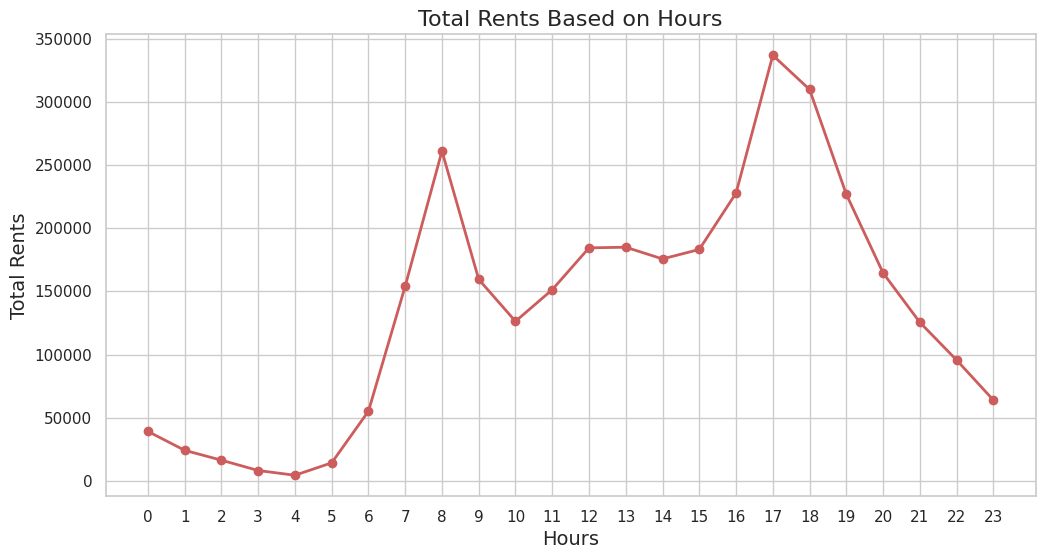

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_rental['hr'], hourly_rental['cnt'], marker='o', color='indianred', linestyle='-', linewidth=2)

plt.title('Total Rents Based on Hours', fontsize=16)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Total Rents', fontsize=14)
plt.xticks(hourly_rental['hr'])
plt.xticks(rotation=0)

plt.show()

### Pertanyaan 3:

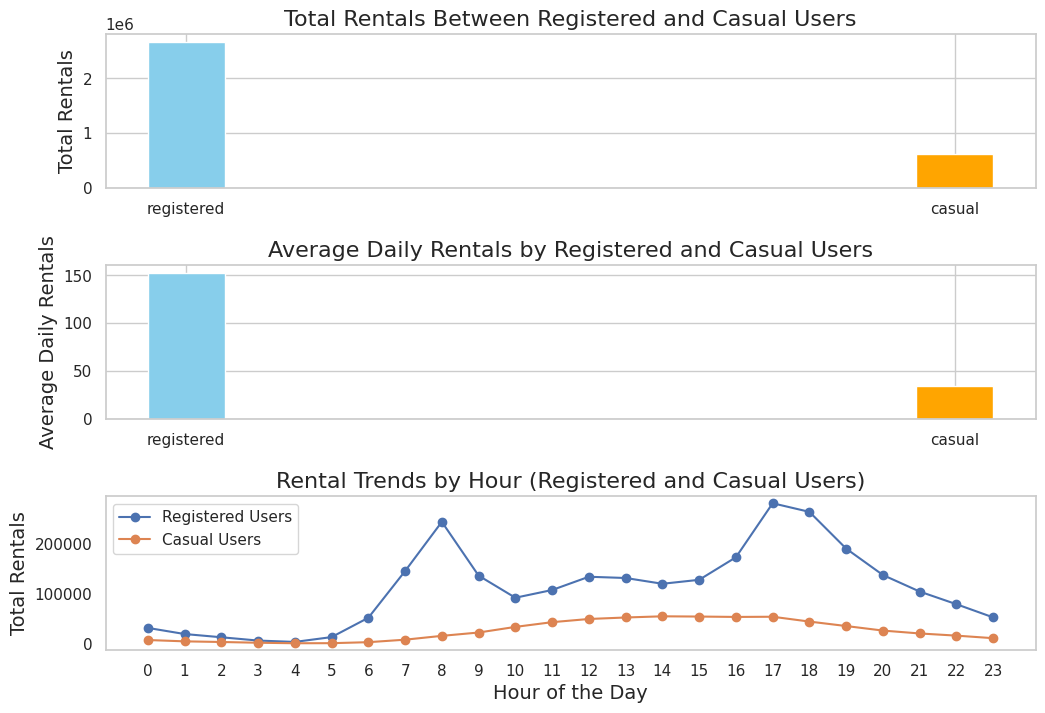

In [154]:
# 1. Total Rentals Between Registered and Casual Users
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.bar(total_rentals['User Type'], total_rentals['Total Rentals'], color=['skyblue', 'orange'], width=0.10)
plt.title('Total Rentals Between Registered and Casual Users', fontsize=16)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(rotation=0)

# 2. Average Daily Rentals by Registered and Casual Users
plt.subplot(3, 1, 2)
plt.bar(avg_daily_rentals['User Type'], avg_daily_rentals['Average Daily Rentals'], color=['skyblue', 'orange'], width=0.10)
plt.title('Average Daily Rentals by Registered and Casual Users', fontsize=16)
plt.ylabel('Average Daily Rentals', fontsize=14)
plt.xticks(rotation=0)


# 3. Rental Trends by Hour for Both Registered and Casual User
plt.subplot(3, 1, 3)
plt.plot(hourly_rentals['hr'], hourly_rentals['registered'], label='Registered Users', marker='o')
plt.plot(hourly_rentals['hr'], hourly_rentals['casual'], label='Casual Users', marker='o')
plt.title('Rental Trends by Hour (Registered and Casual Users)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(hourly_rentals['hr'])
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()


### Pertanyaan 4:

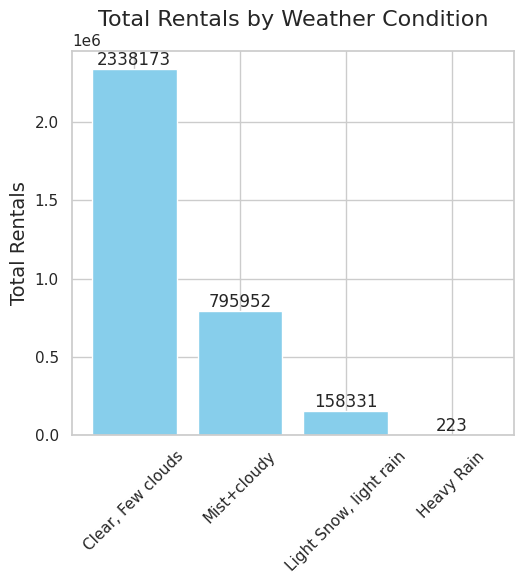

In [164]:
plt.figure(figsize=(10, 6))

#total rentals by weathersit
plt.subplot(1, 2, 1)
plt.bar(weathersit_rentals['Weather Condition'], weathersit_rentals['Total Rentals'], color='skyblue')
plt.title('Total Rentals by Weather Condition', fontsize=16)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(rotation=45)

for index, value in enumerate(weathersit_rentals['Total Rentals']):
    plt.text(index, value, f"{value}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Untuk pertanyaan pertama mengenai "Jumlah penyewaan sepeda berdasarkan kategori hari", hasil analisis divisualisasikan dalam bentuk diagram batang. Pada diagram batang pertama, terlihat bahwa penyewaan sepeda mencapai angka tertinggi pada hari kerja, dengan total 2.292.410 penyewaan selama tahun 2011-2012. Sebaliknya, jumlah penyewaan terendah terjadi pada hari libur. Pada diagram batang kedua, terlihat bahwa penyewaan sepeda pada hari kerja menunjukkan pola yang stabil, dengan puncak tertinggi terjadi pada hari Kamis.
- Untuk pertanyaan kedua mengenai "jumlah penyewaan sepeda sepanjang hari berdasarkan jam-jam tertentu", hasil analisis divisualisasikan dengan *line chart* agar dapat melihat tren serta dinamika jumlah penyewaan sepeda pada berbagai jam. Pada diagram garis, terlihat bahwa penyewaan sepeda mengalami peningkatan yang signifikan dimulai pada pukul 6-8 pagi hari dan mencapai puncak tertinggi pada pukul 5-6 sore.
- Untuk pertanyaan mengenai "Perbandingan *registered and casual users* dalam jumlah penyewaan sepeda", jawabannya divisualisasikan dengan menggunakan diagram batang dan juga diagram garis. Pada diagram batang pertama dan kedua, *registered users* memiliki tingkat penyewaan sepeda jauh lebih tinggi dibandingkan dengan *casual users*, dengan *registered users* memiliki rata-rata penyewaan sepeda harian di angka 153. Pada diagram garis, *registered users* cenderung menyewa sepeda pada jam-jam kerja untuk keperluan mobilitas, sedangkan pola sewa dari *casual users* lebih fluktuatif, yang menunjukkan bahwa mereka memiliki lebih banyak waktu luang untuk beraktivitas.
- Untuk pertanyaan keempat mengenai "Pada saat cuaca apa jumlah penyewaan sepeda paling sedikit? ", jawabannya divisualisasikan dengan diagram batang. Pada diagram, jumlah penyewaan sepeda yang paling sedikit jatuh pada saat cuaca ekstrim, yaitu hujan lebat disertai badai atau bersalju disertai kabut. Tentunya hal ini masuk akal karena pada cuaca ekstrim, orang-orang tidak bisa beraktivitas secara normal.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: *Working day*, *weekend*, dan *holiday* mempengaruhi jumlah penyewaan sepeda. Jumlah penyewaan sepeda meningkat pada saat hari kerja dikarenakan adanya kebutuhan mobilitas dari pelanggan. Sedangkan, jumlah terendah jatuh pada *holiday*.
- Conclusion pertanyaan 2: Jam-jam tertentu sangat menentukan jumlah penyewaan sepeda. Berdasarkan hasil analisis, Jumlah penyewaan sepeda mengalami peningkatan signifikan pada pukul 6-8 pada pagi hari dan mencapai titik puncak pada pukul 5-6 sore harinya. Hal ini dikarenakan orang-orang membutuhkan kendaraan untuk melakukan mobilitas pada waktu berangkat dan pulang kerja atau bersekolah. Jumlah penyewaan sepeda kemudian mengalami penurunan secara signifikan pada malam hari dikarenakan orang-orang sudah membatasi kegiatannya pada malam hari.
- Conclusion pertanyaan 3: *Registered users* memiliki tingkat penyewaan sepeda lebih tinggi dibandingkan *casual users*. Hal ini mengindikasikan bahwa pengguna ini menggunakan sepeda sebagai sarana mobilitas secara konsisten. Dari analisis jenis pola sewa masing-masng *user* pada jam-jam tertentu, sebagian besar *registered users* cenderung menyewa sepeda pada jam-jam sibuk, sedangkan *casual users* memiliki pola fluktuatif yang mengindikasikan bahwa mereka memiliki lebih banyak waktu luang.  
- Conclusion pertanyaan 4: Kondisi cuaca sangatlah berpengaruh pada jumlah penyewaan sepeda. Jika cuaca cerah dan cenderung berawan, jumlah penyewaan sepeda meningkat. Sebaliknya, jumlah penyewaan sepeda terendah jatuh pada saat cuaca ekstrim seperti hujan lebat, badai salju, atau cuaca berkabut. Hal ini dikarenakan orang-orang yang membatasi kegiatannya.